### ESMA 3016
### Edgar Acuna
### Lab16: Distribucion Normal o Gaussiana
#### Octubre 2020

In [1]:
from scipy.stats  import norm,probplot
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt,factorial,pi,exp
from scipy.integrate import quad
%matplotlib inline

$$f(x)=\frac{e^\frac{-(x-\mu)^2}{2\sigma}}{\sigma \sqrt{2\pi}},$$
$-\infty<x<\infty$, $-\infty<\mu<\infty$, $\sigma>0$

Graficando la Normal estandar $\mu=0$ y $\sigma=1$

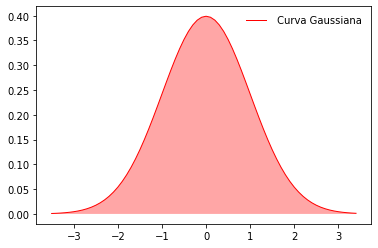

In [2]:
x=np.arange(-3.5,3.5,.1)
plt.plot(x, norm.pdf(x), 'k-', lw=1, label=' Curva Gaussiana',color='r')
plt.fill_between(x, y1= norm.pdf(x),facecolor='red',alpha=0.35)
plt.legend(loc='best', frameon=False)

In [3]:
#Calculando aproximadamente la integral que da el area total debajo de la curva
def integrando(x):
    return exp(-x**2/2)/sqrt(2*pi)
quad(integrando,-np.infty,np.infty)

(0.9999999999999998, 1.0178191349259989e-08)

### Area debajo de la normal estandar a la izquierda de x=1.5

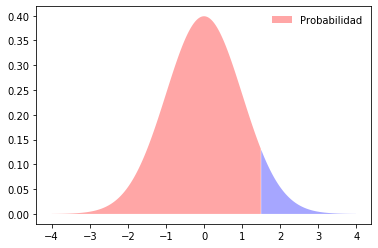

In [4]:
plt.fill_between(x=np.arange(-4,1.5,0.01), y1= norm.pdf(np.arange(-4,1.5,0.01)),facecolor='red',alpha=0.35,label='Probabilidad')
plt.fill_between(x=np.arange(1.5,4,0.01), y1= norm.pdf(np.arange(1.5,4,0.01)),facecolor='blue',alpha=0.35)
plt.legend(loc='best', frameon=False)

In [5]:
norm.cdf(1.5,0,1)

0.9331927987311419

### Area entre x=-2.25 y x=2.07

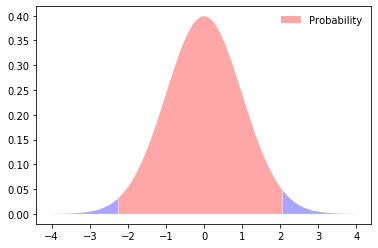

In [6]:
plt.fill_between(x=np.arange(-4,-2.25,0.01), y1= norm.pdf(np.arange(-4,-2.25,0.01)),facecolor='blue',alpha=0.35)
plt.fill_between(x=np.arange(-2.25,2.07,0.01), y1= norm.pdf(np.arange(-2.25,2.07,0.01)),facecolor='red',alpha=0.35,
                label='Probability')
plt.fill_between(x=np.arange(2.07,4,0.01), y1= norm.pdf(np.arange(2.07,4,0.01)),facecolor='blue',alpha=0.35)
plt.legend(loc='best', frameon=False)

In [7]:
norm.cdf(2.07)-norm.cdf(-2.25)

0.968549355117438

In [8]:
#Area mas alla de x=.55
1-norm.cdf(.55)

0.29115968678834636

In [9]:
#Calculo de cuantiles(percentiles) para la normal estandar
#el 20% inferior
norm.ppf(.2)

-0.8416212335729142

In [10]:
#el 10% superior
norm.ppf(.9)

1.2815515655446004

In [11]:
#Verificando que el area de la mitad de la curva normal es .5
#Esta funcion no es muy estable para valores grandes de x, mejor usar la segunda forma de la celda de abajo
def halfnormal(x,k):
     #x es el punto hasta donde se calcula el area desde el centro,x>0
     #k+1 es el numero de terminos que se usan de la serie de potencias para aproximar el area 
    normal_5=0.0
    for i in range(0,k):
        tempo=((-1)**i)*(x/float(2*i+1))*((x**2)/float(2))**i*(1/float(factorial(i)))
        normal_5=normal_5+tempo
    return(normal_5/sqrt(2*pi))

In [12]:
halfnormal(4.5,105)

0.49999660232686216

In [13]:
#Otra manera mas estable
#Calculando aproximadamente la integral que da el area de la mitad
def integrando(x):
    return exp(-x**2/2)/sqrt(2*pi)
quad(integrando,0,np.infty)

(0.4999999999999999, 5.089095674629994e-09)

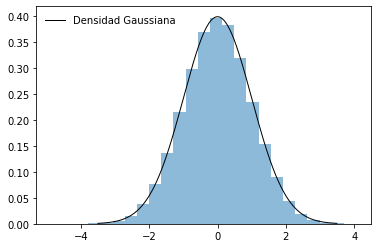

In [14]:
#***************************************************************************
#simulando una muestra de 10000 valores de una normal estandar
a=norm.rvs(size=100000)
#Haciendo un histograma de los datos pero de tal manera que el area total sea 1
#Comparando graficamente el histograma con la curva normal
x=np.arange(-3.5,3.5,.01)
fig, ax = plt.subplots(1, 1)
ax.hist(a, bins=25,density = True,alpha=.5)
ax.plot(x, norm.pdf(x), 'k-', lw=1, label='Densidad Gaussiana')
ax.legend(loc='best', frameon=False)

In [15]:
#Estimando la media y varianza de una normal
np.mean(a)

-0.0014724632261364564

In [16]:
np.var(a)

0.9907904078494382

### Ejemplo de aplicacion

Los promedios academicos de los egresados de uan universidad se distribuyen normalmente con media 
$\mu=2.5$ y desviacion estandar $\sigma=.5$

a) cual es la probabilidad de que un egresado se haya graduado con un un gpa menor que 3.0

In [17]:
norm.cdf(3.0,2.5,.5)

0.8413447460685429

b) cual es la probabildiad de que un egresado se haya graduado con un gpa de mas de 3.5?

In [18]:
1-norm.cdf(3.5,2.5,.5)

0.02275013194817921

c) cual es la probabilidad de que un egresado se haya graduado con un gpa mayor de 2.0 pero menor de 3.3

In [19]:
norm.cdf(3.3,2.5,.5)-norm.cdf(2.0,2.5,.5)

0.7865454543689849

d) A los egresados que tengan un GPA que caen el el 1% superior se le dara un premio cual es el gpa minimo
para obtener un premio?

In [20]:
norm.ppf(.99,2.5,.5) 

3.6631739370204204

### Ejemplo 2.  
El tiempo que le toma a los estudiantes en ir de su casa a la Universidad se distribuye normalmente con media 20 minutos y desviación estándar 5. 

a)	¿Cuál es la probabilidad de que a un estudiante le tome más de 18 minutos en llegar a la universidad?

In [21]:
1-norm.cdf(18,20,5)

0.6554217416103242

b) ¿Cuál es la probabilidad de que un estudiante llegue a la universidad en menos de 30 minutos?  

In [22]:
norm.cdf(30,20,5)

0.9772498680518208

c)	¿A qué hora debe salir el estudiante de su casa si se desea que llegue tarde a su clase de la 8:00 a.m. solamente un 5 por ciento de las veces?


In [23]:
#Hallando el precentile del 95%
norm.ppf(.95,20,5)

28.22426813475736

Luego, le restamos esos minutos a las 8am y esa seria la hora de salida 8.00 - .28=7.32am 

### Cotejando normalidad de una muestra usando un plot de normalidad

(array([  21.,  172., 1048., 3446., 6032., 5476., 2855.,  813.,  129.,
           8.]),
 array([-3.91667739, -3.1151994 , -2.31372142, -1.51224343, -0.71076545,
         0.09071254,  0.89219052,  1.69366851,  2.49514649,  3.29662448,
         4.09810246]),
 <a list of 10 Patch objects>)

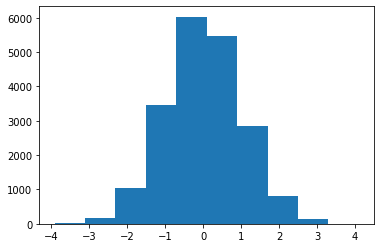

In [24]:
#Generando al azar la muestra
muestra=norm.rvs(size=20000)
plt.hist(muestra)

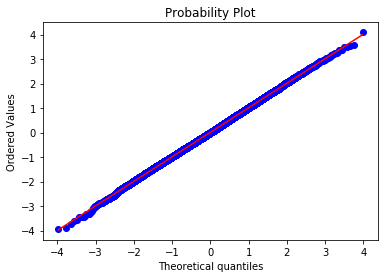

In [25]:
res=probplot(muestra,plot=plt)
plt.show()

### En la parte central los puntos estan en la linea diagonal pero en los extremos de la distribucion los puntos tienden a alejarse de la diagonal, lo cual es una indicacion de que no hay normalidad